<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<h1> Exploratory Data Analysis</h2>


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
#from js import fetch
#import io

#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp = await fetch(URL)
#dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv("dataset_part_2_FromCoursera.csv")
df.head(2)

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. <<NOTE: Well obviously, the larger the flight number, the more experience the teams have had in launching and landing. >>
<<NOTE : I don't see this second point in the data>> The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


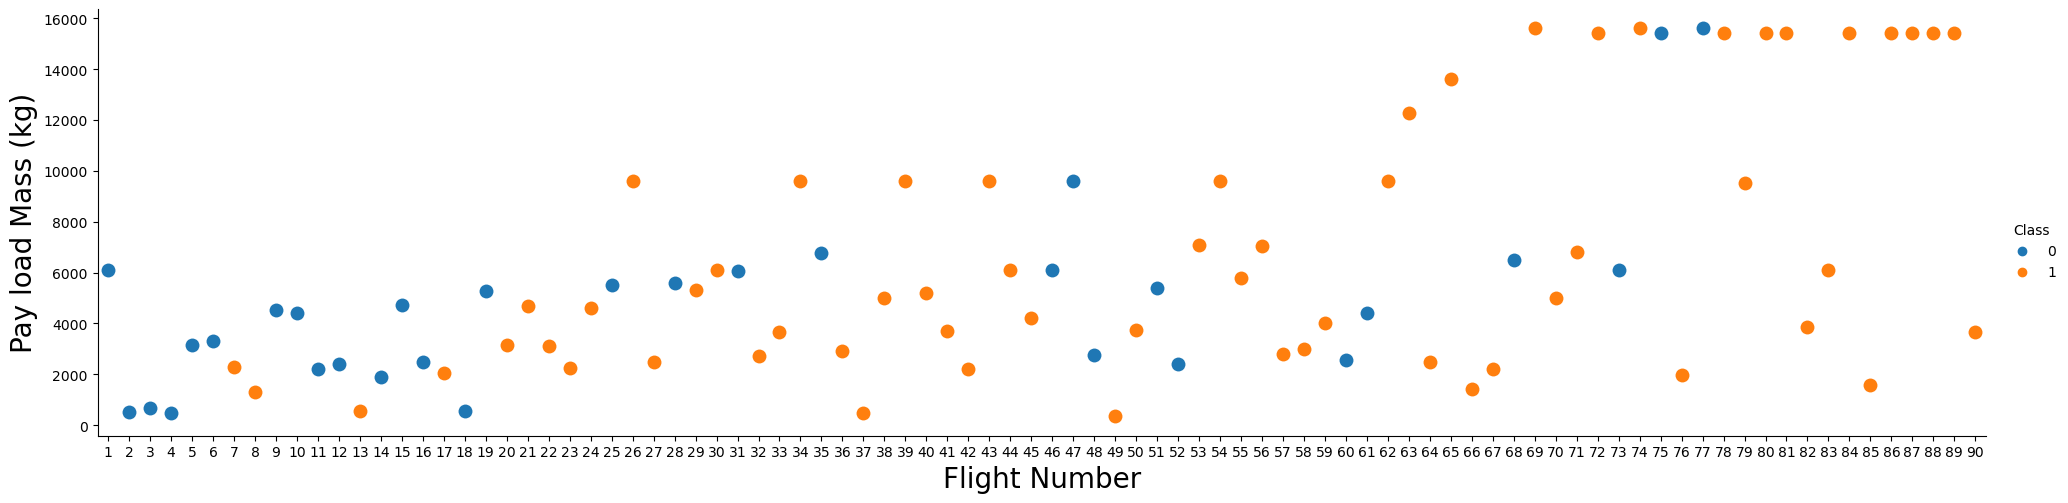

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4, size=10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


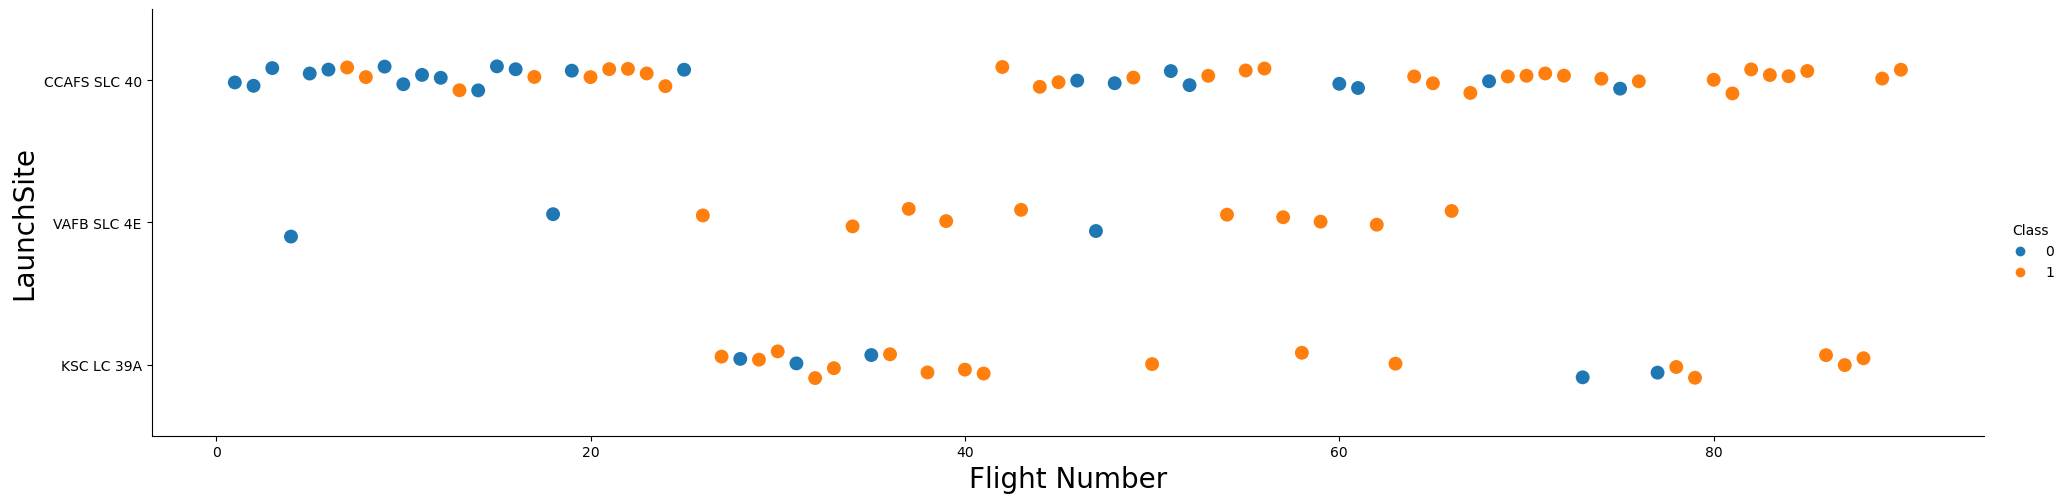

In [5]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 4, size=10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.
1) As the flight number increases the success of the landing is more likely.  But this is most likely because of learned experience over time, and nothing to do with location.
2) If you look at the success reate of the CCAFS SLC 40 location on a whole, it is lower than the other two locations.  BUT, between 25-30% of the initial launches came from this site, so this skews the data to appear as if the location is inferior to the others.  It would be smarter to look at the location and success rates comparisons at later points in time (higher flight numbers) - say > 25.  (SEE CODE BELOW TO PROVE THIS POINT)

In [6]:
success_rate = df.groupby("LaunchSite")["Class"].mean()
print( "Success rate all: ", success_rate )

Success rate all:  LaunchSite
CCAFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64


In [7]:
#compute the average success rate of landings for each location - when the flight number is > 25
df_grt25 = df[df['FlightNumber'] > 25]
success_rate_grt25 = df_grt25.groupby("LaunchSite")["Class"].mean()
print( "Success rate > 25", success_rate_grt25 )


Success rate > 25 LaunchSite
CCAFS SLC 40    0.750000
KSC LC 39A      0.772727
VAFB SLC 4E     0.909091
Name: Class, dtype: float64


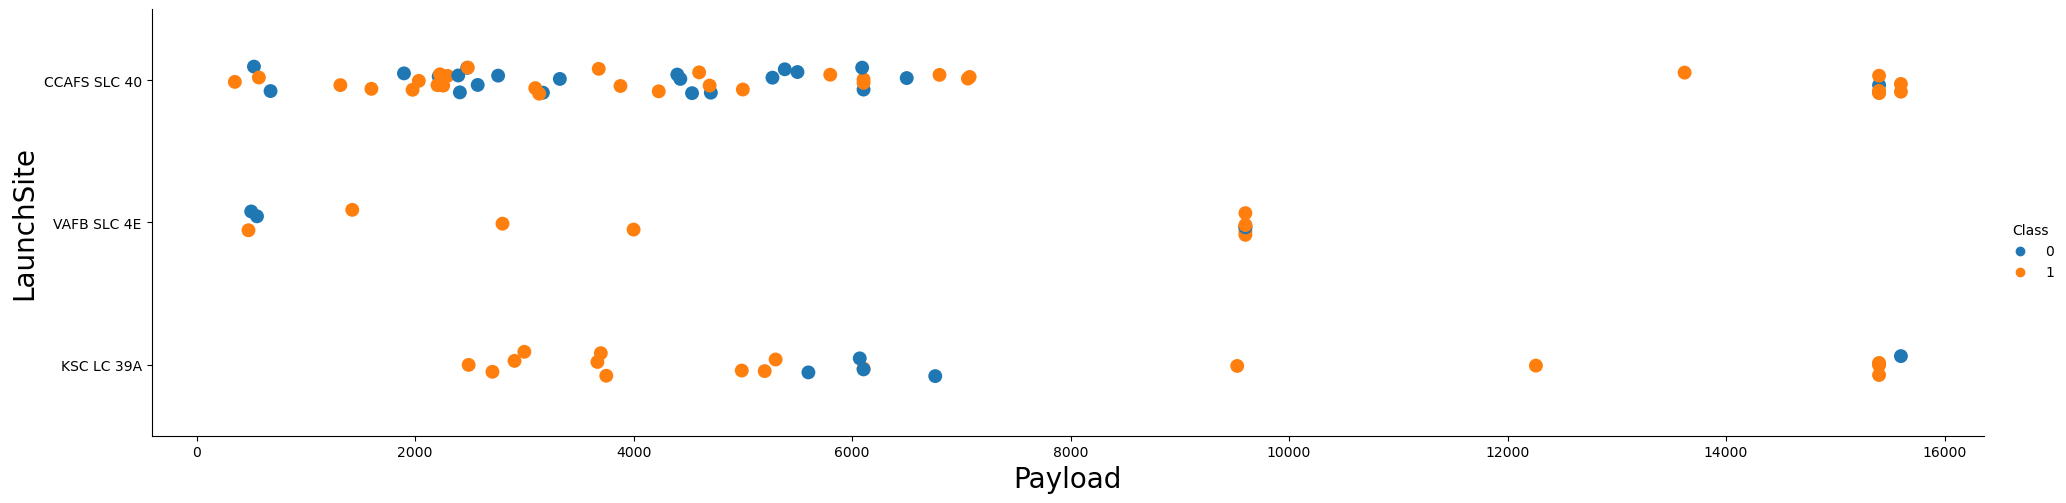

In [8]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 4, size=10)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [9]:
### TASK  3: Visualize the relationship between success rate of each orbit type
##--------------------------------------------------------------------------------

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the success rate of each orbit
# HINT use groupby method on Orbit column and get the mean of Class column

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64


<Axes: xlabel='Orbit', ylabel='MeanSuccessRate'>

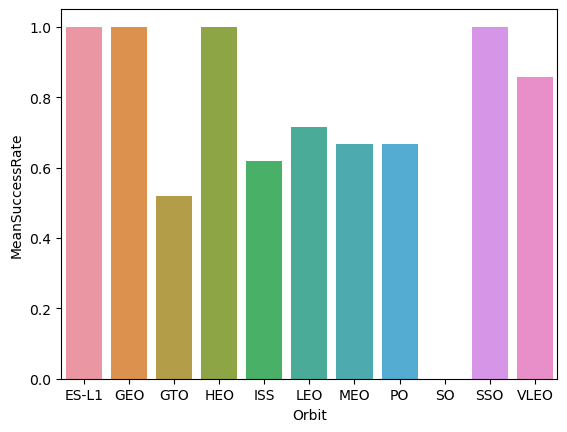

In [10]:
success_rate_Orbit = df.groupby("Orbit")["Class"].mean()
print(success_rate_Orbit)

# Convert the Series to a DataFrame using to_frame() and reset index
success_rate_Orbit_df = success_rate_Orbit.to_frame(name='MeanSuccessRate').reset_index()
# Convert the Series to a DataFrame and reset index
#success_rate_Orbit_df = success_rate_Orbit.reset_index(name='MeanSuccessRate')

sns.barplot(data=success_rate_Orbit_df, x="Orbit", y="MeanSuccessRate")





Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [11]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
####-----------------------------------------------------------------------

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


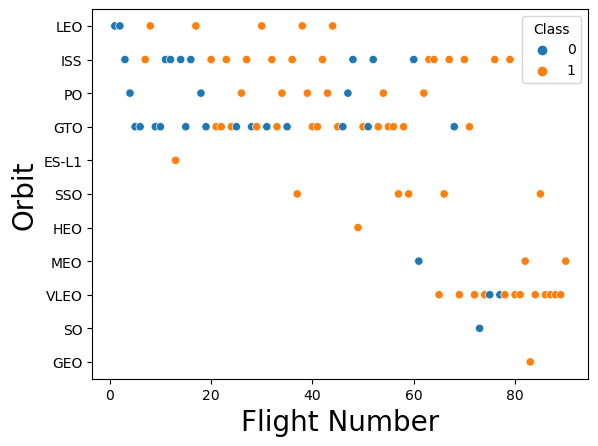

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()



You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [13]:
### TASK  5: Visualize the relationship between Payload and Orbit type
###-------------------------------------------------------------------------

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


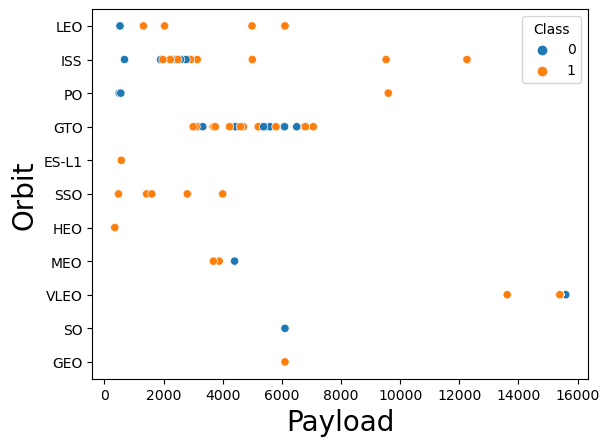

In [14]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [15]:
### TASK  6: Visualize the launch success yearly trend
###--------------------------------------------------------

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year #add column year to the dataframe
df.head()
    

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [17]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# 1- Compute the Yearly Success Rate
YearlySuccessRate = df.groupby("Year")["Class"].mean()
YearlySuccessRate = YearlySuccessRate.to_frame()
YearlySuccessRate = YearlySuccessRate.rename(columns={'Class': 'SuccessRate'})
YearlySuccessRate

,SuccessRate
Year,
2010,0.000000
2012,0.000000
2013,0.000000
2014,0.333333
2015,0.333333
2016,0.625000
2017,0.833333
2018,0.611111
2019,0.900000


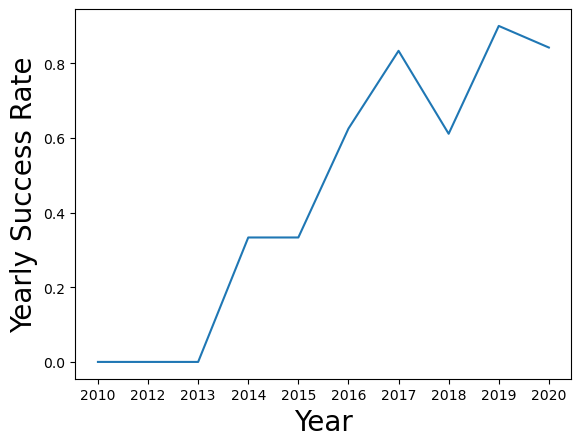

In [18]:
sns.lineplot(x="Year", y="SuccessRate", data=YearlySuccessRate)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Yearly Success Rate",fontsize=20)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [19]:
## Features Engineering
##-------------------------------

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [21]:
### TASK  7: Create dummy variables to categorical columns
#---------------------------------------------------------------------

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [27]:
# HINT: Use get_dummies() function on the categorical columns
# Perform one-hot encoding using get_dummies()

features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad','Serial'], prefix='CAT')
#features_one_hot = pd.get_dummies(df, columns = ['Serial'], prefix='CAT')
#features_one_hot.head(2)

# Concatenate the one hot encoded DataFrame with the original DataFrame
features_one_hot = pd.concat([features, features_one_hot], axis=1)

features_one_hot.head(2)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,CAT_B1048,CAT_B1049,CAT_B1050,CAT_B1051,CAT_B1054,CAT_B1056,CAT_B1058,CAT_B1059,CAT_B1060,CAT_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
### TASK  8: Cast all numeric columns to `float64`
#------------------------------------------------------------

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [28]:
# HINT: use astype function
# features_one_hot = features_one_hot.astype('float64')

ValueError: could not convert string to float: 'LEO'

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
